# Basic Image Classification with TensorFlow

## Import libraries and datasets

In [1]:
import tensorflow as tf
print ('Using TensorFlow version: ', tf.__version__)

from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow version:  2.3.1


## Model shape display

In [2]:
print('Training dataset shape: ', x_train.shape)
print('Training label set shape: ', y_train.shape)
print('Test dataset shape: ', x_test.shape)
print('Test label set shape: ', y_test.shape)

Training dataset shape:  (60000, 28, 28)
Training label set shape:  (60000,)
Test dataset shape:  (10000, 28, 28)
Test label set shape:  (10000,)


## Training data setup

In [3]:
#Encode labels

from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)


#Reshape training data (unroll pixel vectors)

import numpy as np

x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))


#Normalize training data

x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

epsilon = 1e-10

x_train_norm = (x_train_reshaped - x_mean) / (x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean) / (x_std + epsilon)

## Model setup

In [4]:
#Create model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


## Model training

In [5]:
model.fit(x_train_norm, y_train_encoded, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3744 - accuracy: 0.8905
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1856 - accuracy: 0.9460
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1408 - accuracy: 0.9589
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1144 - accuracy: 0.9657
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0966 - accuracy: 0.9715


## Model evaluation

In [6]:
model.evaluate(x_test_norm, y_test_encoded)

313/313 [==============================] - 0s 761us/step - loss: 0.1047 - accuracy: 0.9662


[0.10472241044044495, 0.9661999940872192]

## Model evaluation (graphical)

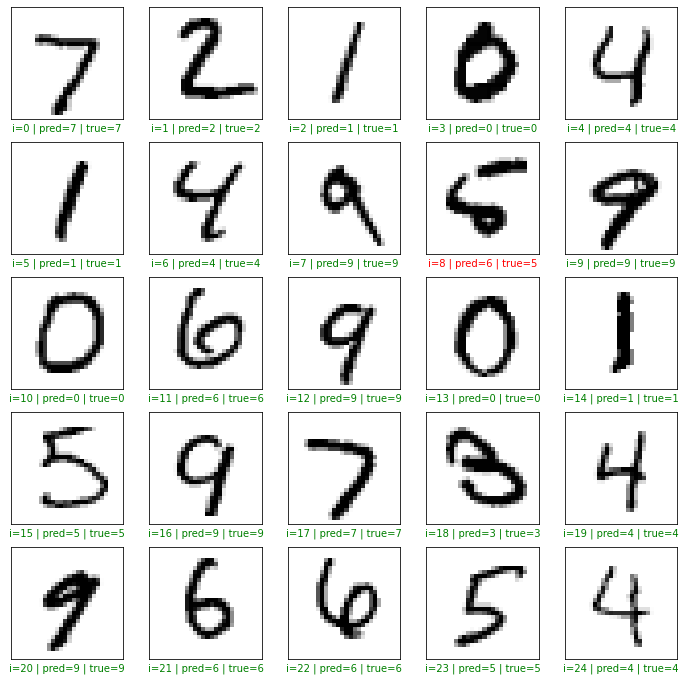

In [7]:
import matplotlib.pyplot as plt

preds = model.predict(x_test_norm)

plt.figure(figsize = (12, 12))
start_index = 0

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred = np.argmax(preds[start_index + i])
    actual = np.argmax(y_test_encoded[start_index + i])
    col = 'g'
    if pred != actual:
        col = 'r'
    plt.xlabel('i={} | pred={} | true={}'.format(start_index + i, pred, actual), color = col)
    plt.imshow(x_test[start_index + i], cmap='binary')
plt.show()

### Individual probability plotting

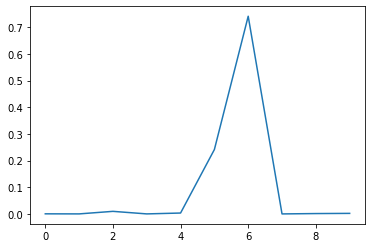

In [8]:
index = 8

plt.plot(preds[index])
plt.show()